<img src="https://test.basel.in/wp-content/uploads/2019/06/KNN-1.jpg" width=400 height=400 />




# KNN - Zoning

The goal of this script is to split a review into different sentences and then classify each of them into different predefined categories

<table>
  <tr>
    <th>Color</th>
    <th>Signification</th>
  </tr>
  <tr>
    <td>Purple</td>
    <td>Introduction</td>
  </tr>
  <tr>
    <td>Red</td>
    <td>Plot</td>
  </tr>
  <tr>
    <td>Blue</td>
    <td>General Analysis of the Play</td>
  </tr>
  <tr>
    <td>Green</td>
    <td>Visual, Auditory and Audible Details</td>
  </tr>
  <tr>
    <td>Orange</td>
    <td>Actors’ Performances</td>
  </tr>
  <tr>
    <td>Brown</td>
    <td>Remarks on the Structure of the Play</td>
  </tr>
  <tr>
    <td>Yellow</td>
    <td>Conclusion</td>
  </tr>
</table>

In [1]:
import pandas as pd
import numpy as np

#Importing the necessary packages and libaries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_excel("../Data/data_final_zoning_sentence_v1.xlsx")
display(df.head(3))
display(df.shape)

,Unnamed: 0,Sentence - Main_Sentence,Sentence - Women/Feminism,Sentence - LGBT / Queer / Sexuality / Gender,Sentence - Disabled,Sentence - Politics,Sentence - Supernatural,Sentence - Science,Sentence - Body,Sentence - Childhood,Sentence - Cultural difference / Race,Sentence - Death,Sentence - Education,Sentence - Family,Sentence - Environment,Sentence - Friendship,Sentence - Love,Sentence - Identity,Sentence - Memory,Sentence - Relationships,Sentence - Religion,Sentence - Violence,Sentence - Spectator_Cat,Sentence - Audience_Cat,Sentence - Show_Cat,Sentence - Story_Cat,Sentence - Decor_Cat,Sentence - Theatre_Cat,Sentence - Production_Cat,Sentence - Character_Cat,Sentence - End_Cat,Sentence - Beginning_Cat,Sentence - Max_Value,Sentence - Cluster,Sentence - Neg,Sentence - Neu,Sentence - Pos,Sentence - Compound,Sentence - Polarity,Sentence - Subjectivity,Sentence - Emotion,Sentence - Angry,Sentence - Fear,Sentence - Happy,Sentence - Sad,Sentence - Surpise,Sentence - Top_10_Keywords,Sentence - Count_Words,Sentence - Question_Mark,Sentence - Exclamation_Mark,Sentence - Word_Average,Sentence - ID,Sentence - Virgules_pct,Sentence - Point_virgules_pct,Sentence - Tirets_pct,Sentence - ID.1,Sentence - Declaratives_pct,Sentence - Interrogatives_pct,Sentence - Exclamatives_pct,Sentence - ID.2,Sentence - Nb_mots,Sentence - Adverbes,Sentence - Noms,Sentence - Verbes,Sentence - Adjectifs,Sentence - Superlatifs,Sentence - ID.3,Sentence - Passe,Sentence - Present,Sentence - Futur,Sentence - ID.4,Sentence - 1e_pers_s,Sentence - 2e_pers,Sentence - 3e_pers_s,Sentence - 1e_pers_p,Sentence - 3e_pers_p,Zone - Main_Sentence_x,Zone - Women/Feminism,Zone - LGBT / Queer / Sexuality / Gender,Zone - Disabled,Zone - Politics,Zone - Supernatural,Zone - Science,Zone - Body,Zone - Childhood,Zone - Cultural difference / Race,Zone - Death,Zone - Education,Zone - Family,Zone - Environment,Zone - Friendship,Zone - Love,Zone - Identity,Zone - Memory,Zone - Relationships,Zone - Religion,Zone - Violence,Zone - Spectator_Cat,Zone - Audience_Cat,Zone - Show_Cat,Zone - Story_Cat,Zone - Decor_Cat,Zone - Theatre_Cat,Zone - Production_Cat,Zone - Character_Cat,Zone - End_Cat,Zone - Beginning_Cat,Zone - Max_Value,Zone - Cluster,Zone - Neg,Zone - Neu,Zone - Pos,Zone - Compound,Zone - Polarity,Zone - Subjectivity,Zone - Emotion,Zone - Angry,Zone - Fear,Zone - Happy,Zone - Sad,Zone - Surpise,Zone - Top_10_Keywords,Zone - Count_Words,Zone - Question_Mark,Zone - Exclamation_Mark,Zone - Word_Average,Zone - Main_Sentence_y,Zone - Sentence_Type,Zone - Type_word_k,Zone - Type_word_v,Zone - ID,Zone - Virgules_pct,Zone - Point_virgules_pct,Zone - Tirets_pct,Zone - ID.1,Zone - Declaratives_pct,Zone - Interrogatives_pct,Zone - Exclamatives_pct,Zone - ID.2,Zone - Nb_mots,Zone - Adverbes,Zone - Noms,Zone - Verbes,Zone - Adjectifs,Zone - Superlatifs,Zone - ID.3,Zone - Passe,Zone - Present,Zone - Futur,Zone - ID.4,Zone - 1e_pers_s,Zone - 2e_pers,Zone - 3e_pers_s,Zone - 1e_pers_p,Zone - 3e_pers_p,Review - Blog,Review - Publication Date,Review - Reviewer,Review - Title of the Play,Review - Playwright,Review - Theatre,Review - Review with Zoning,Review - Intro-Purple,Review - Red-Plot,Review - Blue-General,Review - Green-Details,Review - Orange-Perf,Review - Borwn-Structure,Review - Yellow-Conclusion,Review - Latitude,Review - Longitude,Review - Women/Feminism,Review - LGBT / Queer / Sexuality / Gender,Review - Disabled,Review - Politics,Review - Supernatural,Review - Science,Review - Body,Review - Childhood,Review - Cultural difference / Race,Review - Death,Review - Education,Review - Family,Review - Environment,Review - Friendship,Review - Love,Review - Identity,Review - Memory,Review - Relationships,Review - Religion,Review - Violence,Review - Spectator_Cat,Review - Audience_Cat,Review - Show_Cat,Review - Story_Cat,Review - Decor_Cat,Review - Theatre_Cat,Review - Production_Cat,Review - Character_Cat,Review - End_Cat,Review - Beginning_Cat,Review - Max_Value,Review - Cluster,Review - Neg,Re

(650, 256)

In [3]:
first_column = df.pop('Target_Variable_Sentence_Type')
df.insert(df.shape[1], 'Target_Variable_Sentence_Type', first_column)
display(df.head(3))

,Unnamed: 0,Sentence - Main_Sentence,Sentence - Women/Feminism,Sentence - LGBT / Queer / Sexuality / Gender,Sentence - Disabled,Sentence - Politics,Sentence - Supernatural,Sentence - Science,Sentence - Body,Sentence - Childhood,Sentence - Cultural difference / Race,Sentence - Death,Sentence - Education,Sentence - Family,Sentence - Environment,Sentence - Friendship,Sentence - Love,Sentence - Identity,Sentence - Memory,Sentence - Relationships,Sentence - Religion,Sentence - Violence,Sentence - Spectator_Cat,Sentence - Audience_Cat,Sentence - Show_Cat,Sentence - Story_Cat,Sentence - Decor_Cat,Sentence - Theatre_Cat,Sentence - Production_Cat,Sentence - Character_Cat,Sentence - End_Cat,Sentence - Beginning_Cat,Sentence - Max_Value,Sentence - Cluster,Sentence - Neg,Sentence - Neu,Sentence - Pos,Sentence - Compound,Sentence - Polarity,Sentence - Subjectivity,Sentence - Emotion,Sentence - Angry,Sentence - Fear,Sentence - Happy,Sentence - Sad,Sentence - Surpise,Sentence - Top_10_Keywords,Sentence - Count_Words,Sentence - Question_Mark,Sentence - Exclamation_Mark,Sentence - Word_Average,Sentence - ID,Sentence - Virgules_pct,Sentence - Point_virgules_pct,Sentence - Tirets_pct,Sentence - ID.1,Sentence - Declaratives_pct,Sentence - Interrogatives_pct,Sentence - Exclamatives_pct,Sentence - ID.2,Sentence - Nb_mots,Sentence - Adverbes,Sentence - Noms,Sentence - Verbes,Sentence - Adjectifs,Sentence - Superlatifs,Sentence - ID.3,Sentence - Passe,Sentence - Present,Sentence - Futur,Sentence - ID.4,Sentence - 1e_pers_s,Sentence - 2e_pers,Sentence - 3e_pers_s,Sentence - 1e_pers_p,Sentence - 3e_pers_p,Zone - Main_Sentence_x,Zone - Women/Feminism,Zone - LGBT / Queer / Sexuality / Gender,Zone - Disabled,Zone - Politics,Zone - Supernatural,Zone - Science,Zone - Body,Zone - Childhood,Zone - Cultural difference / Race,Zone - Death,Zone - Education,Zone - Family,Zone - Environment,Zone - Friendship,Zone - Love,Zone - Identity,Zone - Memory,Zone - Relationships,Zone - Religion,Zone - Violence,Zone - Spectator_Cat,Zone - Audience_Cat,Zone - Show_Cat,Zone - Story_Cat,Zone - Decor_Cat,Zone - Theatre_Cat,Zone - Production_Cat,Zone - Character_Cat,Zone - End_Cat,Zone - Beginning_Cat,Zone - Max_Value,Zone - Cluster,Zone - Neg,Zone - Neu,Zone - Pos,Zone - Compound,Zone - Polarity,Zone - Subjectivity,Zone - Emotion,Zone - Angry,Zone - Fear,Zone - Happy,Zone - Sad,Zone - Surpise,Zone - Top_10_Keywords,Zone - Count_Words,Zone - Question_Mark,Zone - Exclamation_Mark,Zone - Word_Average,Zone - Main_Sentence_y,Zone - Sentence_Type,Zone - Type_word_k,Zone - Type_word_v,Zone - ID,Zone - Virgules_pct,Zone - Point_virgules_pct,Zone - Tirets_pct,Zone - ID.1,Zone - Declaratives_pct,Zone - Interrogatives_pct,Zone - Exclamatives_pct,Zone - ID.2,Zone - Nb_mots,Zone - Adverbes,Zone - Noms,Zone - Verbes,Zone - Adjectifs,Zone - Superlatifs,Zone - ID.3,Zone - Passe,Zone - Present,Zone - Futur,Zone - ID.4,Zone - 1e_pers_s,Zone - 2e_pers,Zone - 3e_pers_s,Zone - 1e_pers_p,Zone - 3e_pers_p,Review - Blog,Review - Publication Date,Review - Reviewer,Review - Title of the Play,Review - Playwright,Review - Theatre,Review - Review with Zoning,Review - Intro-Purple,Review - Red-Plot,Review - Blue-General,Review - Green-Details,Review - Orange-Perf,Review - Borwn-Structure,Review - Yellow-Conclusion,Review - Latitude,Review - Longitude,Review - Women/Feminism,Review - LGBT / Queer / Sexuality / Gender,Review - Disabled,Review - Politics,Review - Supernatural,Review - Science,Review - Body,Review - Childhood,Review - Cultural difference / Race,Review - Death,Review - Education,Review - Family,Review - Environment,Review - Friendship,Review - Love,Review - Identity,Review - Memory,Review - Relationships,Review - Religion,Review - Violence,Review - Spectator_Cat,Review - Audience_Cat,Review - Show_Cat,Review - Story_Cat,Review - Decor_Cat,Review - Theatre_Cat,Review - Production_Cat,Review - Character_Cat,Review - End_Cat,Review - Beginning_Cat,Review - Max_Value,Review - Cluster,Review - Neg,Re

In [4]:
df2 = df[[
 'Sentence - Women/Feminism',
 'Sentence - LGBT / Queer / Sexuality / Gender',
 'Sentence - Disabled',
 'Sentence - Politics',
 'Sentence - Supernatural',
 'Sentence - Science',
 'Sentence - Body',
 'Sentence - Childhood',
 'Sentence - Cultural difference / Race',
 'Sentence - Death',
 'Sentence - Education',
 'Sentence - Family',
 'Sentence - Environment',
 'Sentence - Friendship',
 'Sentence - Love',
 'Sentence - Identity',
 'Sentence - Memory',
 'Sentence - Relationships',
 'Sentence - Religion',
 'Sentence - Violence',
 'Sentence - Spectator_Cat',
 'Sentence - Audience_Cat',
 'Sentence - Show_Cat',
 'Sentence - Story_Cat',
 'Sentence - Decor_Cat',
 'Sentence - Theatre_Cat',
 'Sentence - Production_Cat',
 'Sentence - Character_Cat',
 'Sentence - End_Cat',
 'Sentence - Beginning_Cat',
 'Sentence - Max_Value',
 'Sentence - Neg',
 'Sentence - Neu',
 'Sentence - Pos',
 'Sentence - Compound',
 'Sentence - Polarity',
 'Sentence - Subjectivity',
 'Sentence - Angry',
 'Sentence - Fear',
 'Sentence - Happy',
 'Sentence - Sad',
 'Sentence - Surpise',
 'Sentence - Count_Words',
 'Sentence - Question_Mark',
 'Sentence - Exclamation_Mark',
 'Sentence - Word_Average',
 'Sentence - Virgules_pct',
 'Sentence - Point_virgules_pct',
 'Sentence - Tirets_pct',
 'Sentence - Declaratives_pct',
 'Sentence - Interrogatives_pct',
 'Sentence - Exclamatives_pct',
 'Sentence - Nb_mots',
 'Sentence - Adverbes',
 'Sentence - Noms',
 'Sentence - Verbes',
 'Sentence - Adjectifs',
 'Sentence - Superlatifs',
 'Sentence - Passe',
 'Sentence - Present',
 'Sentence - Futur',
 'Sentence - 1e_pers_s',
 'Sentence - 2e_pers',
 'Sentence - 3e_pers_s',
 'Sentence - 1e_pers_p',
 'Sentence - 3e_pers_p',
 'Zone - Women/Feminism',
 'Zone - LGBT / Queer / Sexuality / Gender',
 'Zone - Disabled',
 'Zone - Politics',
 'Zone - Supernatural',
 'Zone - Science',
 'Zone - Body',
 'Zone - Childhood',
 'Zone - Cultural difference / Race',
 'Zone - Death',
 'Zone - Education',
 'Zone - Family',
 'Zone - Environment',
 'Zone - Friendship',
 'Zone - Love',
 'Zone - Identity',
 'Zone - Memory',
 'Zone - Relationships',
 'Zone - Religion',
 'Zone - Violence',
 'Zone - Spectator_Cat',
 'Zone - Audience_Cat',
 'Zone - Show_Cat',
 'Zone - Story_Cat',
 'Zone - Decor_Cat',
 'Zone - Theatre_Cat',
 'Zone - Production_Cat',
 'Zone - Character_Cat',
 'Zone - End_Cat',
 'Zone - Beginning_Cat',
 'Zone - Max_Value',
 'Zone - Neg',
 'Zone - Neu',
 'Zone - Pos',
 'Zone - Compound',
 'Zone - Polarity',
 'Zone - Subjectivity',
 'Zone - Angry',
 'Zone - Fear',
 'Zone - Happy',
 'Zone - Sad',
 'Zone - Surpise',
 'Zone - Count_Words',
 'Zone - Question_Mark',
 'Zone - Exclamation_Mark',
 'Zone - Word_Average',
 'Zone - Virgules_pct',
 'Zone - Point_virgules_pct',
 'Zone - Tirets_pct',
 'Zone - Declaratives_pct',
 'Zone - Interrogatives_pct',
 'Zone - Exclamatives_pct',
 'Zone - Nb_mots',
 'Zone - Adverbes',
 'Zone - Noms',
 'Zone - Verbes',
 'Zone - Adjectifs',
 'Zone - Superlatifs',
 'Zone - Passe',
 'Zone - Present',
 'Zone - Futur',
 'Zone - 1e_pers_s',
 'Zone - 2e_pers',
 'Zone - 3e_pers_s',
 'Zone - 1e_pers_p',
 'Zone - 3e_pers_p',
 'Review - Latitude',
 'Review - Longitude',
 'Review - Women/Feminism',
 'Review - LGBT / Queer / Sexuality / Gender',
 'Review - Disabled',
 'Review - Politics',
 'Review - Supernatural',
 'Review - Science',
 'Review - Body',
 'Review - Childhood',
 'Review - Cultural difference / Race',
 'Review - Death',
 'Review - Education',
 'Review - Family',
 'Review - Environment',
 'Review - Friendship',
 'Review - Love',
 'Review - Identity',
 'Review - Memory',
 'Review - Relationships',
 'Review - Religion',
 'Review - Violence',
 'Review - Spectator_Cat',
 'Review - Audience_Cat',
 'Review - Show_Cat',
 'Review - Story_Cat',
 'Review - Decor_Cat',
 'Review - Theatre_Cat',
 'Review - Production_Cat',
 'Review - Character_Cat',
 'Review - End_Cat',
 'Review - Beginning_Cat',
 'Review - Max_Value',
 'Review - Neg',
 'Review - Neu',
 'Review - Pos',
 'Review - Compound',
 'Review - Polarity',
 'Review - Subjectivity',
 'Review - Angry',
 'Review - Fear',
 'Review - Happy',
 'Review - Sad',
 'Review - Surpise',
 'Review - Nbr_of_Sentences',
 'Review - Length_Start_Count_Words_1',
 'Review - Length_End_Count_Words_1',
 'Review - Length_Start_Count_Words_2',
 'Review - Length_End_Count_Words_2',
 'Review - Length_Start_Count_Words_3',
 'Review - Length_End_Count_Words_3',
 'Review - Question_Mark_Start_1',
 'Review - Question_Mark_End_1',
 'Review - Question_Mark_Start_2',
 'Review - Question_Mark_End_2',
 'Review - Question_Mark_Start_3',
 'Review - Question_Mark_End_3',
 'Review - Exclamation_Mark_Start_1',
 'Review - Exclamation_Mark_End_1',
 'Review - Exclamation_Mark_Start_2',
 'Review - Exclamation_Mark_End_2',
 'Review - Exclamation_Mark_Start_3',
 'Review - Exclamation_Mark_End_3',
 'Review - Word_Average_Start_1',
 'Review - Word_Average_End_1',
 'Review - Word_Average_Start_2',
 'Review - Word_Average_End_2',
 'Review - Word_Average_Start_3',
 'Review - Word_Average_End_3',
 'Zone - Start Index',
 'Zone - Count Character',
 'Review - Count Character',
 'Zone - Count Word',
 'Review - Count Word',
 'Sentence - Start Index',
 'Sentence - Count Character',
 'Sentence - Count Word',
 'Target_Variable_Sentence_Type']]

In [5]:
df2.shape

(650, 210)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
import sklearn as sk
scaler = StandardScaler()
scaler.fit(df2.drop('Target_Variable_Sentence_Type',axis=1))
scaled_features = scaler.transform(df2.drop('Target_Variable_Sentence_Type',axis=1))
df2 = pd.DataFrame(scaled_features,columns=df2.columns[:-1])
df2.head()

X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Target_Variable_Sentence_Type'],
                                                    test_size=0.30)

model = KNeighborsClassifier(n_neighbors=3)
rfe = RFE(model, 10)
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)
X_test = np.nan_to_num(X_test)
y_test = np.nan_to_num(y_test)
#fit = rfe.fit(X_train,y_train)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print("Accuracy:",sk.metrics.accuracy_score(y_test, pred))

Accuracy: 0.5435897435897435


/Users/gaetanbrison/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [7]:
labels = ["Purple - Introduction","Red - Plot","Blue - General","Green - Details","Orange - Performances","Brown - Structure","Yellow - Conclusion"]

In [8]:
# creating a confusion matrix
cm = confusion_matrix(y_test, pred)

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion Matrix KNN: \n', cm)
print(classification_report(y_test, pred, target_names=labels))

Confusion Matrix KNN: 
 [[41  5  1  0  2  1  1]
 [ 9 34  3  1  2  0  1]
 [10  4 16  1  3  0  0]
 [ 4  5  1  7  0  0  0]
 [ 4  4  2  3  4  0  0]
 [ 0  2  2  0  0  3  0]
 [ 7  4  2  4  1  0  1]]
                       precision    recall  f1-score   support

Purple - Introduction       0.55      0.80      0.65        51
           Red - Plot       0.59      0.68      0.63        50
       Blue - General       0.59      0.47      0.52        34
      Green - Details       0.44      0.41      0.42        17
Orange - Performances       0.33      0.24      0.28        17
    Brown - Structure       0.75      0.43      0.55         7
  Yellow - Conclusion       0.33      0.05      0.09        19

             accuracy                           0.54       195
            macro avg       0.51      0.44      0.45       195
         weighted avg       0.52      0.54      0.51       195



In [10]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

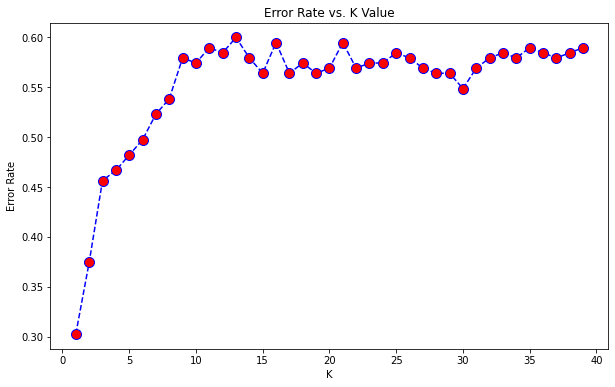

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [13]:
import pickle
filename = 'finalized_model_knn_v3_sentence.sav'
pickle.dump(knn, open(filename, 'wb'))
 